In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
from collections import Counter
from random import randint
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
if not os.path.exists("/content/football_data.csv"):
    os.symlink("/content/drive/My Drive/DataAnalytics/Clustering_Football/football_data.csv","/content/football_data.csv")  

# **Load Data and view samples**

In [7]:
df=pd.read_csv('football_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
df.shape

(18207, 89)

**Data Description**

This dataset contains features of around 18k football players. Pandas dataframe shows that there are 89 categorical and numerical attributes.

All the 89 columns as below . 

**These columns can be organized into different categories. **



*   Athletic profile like height,weight and body type
*   Personal details like Nationality,Club affiliation ,wages,Flag, Photo
*   Professional ranking like potential
*   Playing skills like Volleys,Sprintspeed 
*   Player Position in the field














In [ ]:
df.shape,df.columns

((18207, 89),
 Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
        'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
        'Preferred Foot', 'International Reputation', 'Weak Foot',
        'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
        'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
        'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
        'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
        'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
        'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
        'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
        'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
        'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
        'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
        'Marking',

Display the fist five rows

In [ ]:
pd.set_option("display.max.columns", None)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


 Display all columns and their data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**Basics Statistics**

In [ ]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

# **Data Cleaning**


We will extract only nummerical attributes from these for the purpose of clustering. Therfore dropping columns that are not useful for this purpose.
 in two satges.



*   Cleaning by dropping few columns and retaining thise useful for exploratory visualizations
*   Dropping all non numerical columns after the visualization section



To make data suitbale for exploratory data analysis, the following cleanup steps are used.

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
drop_columns=['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo','Real Face', 'Special', 'Joined', 'Loaned From', 'Contract Valid Until','Release Clause']
df.drop(drop_columns, 1,inplace=True)

In [ ]:
pd.set_option("display.max.columns", None)
df.tail()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,22.0,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,21.0,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,33.0,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,34.0,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0
18206,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,Right,1.0,3.0,2.0,Medium/ Medium,Lean,CM,33.0,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0


**Converting height  in 5' 8" fotmat to inches**

In [ ]:
def isNaN(num):
    return num != num

def set_ht(ht):
  
  if isNaN(ht):
      return None
  # format: 7' 0.0"
  ht=str(ht)+'\"'
  ht_ = ht.split("'")
  ft_ = float(ht_[0])
  in_ = float(ht_[1].replace("\"",""))

  return (12*ft_) + in_

df["Height"]=df["Height"].apply(lambda x:set_ht(x))

In [ ]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,67.0,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,74.0,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,69.0,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,76.0,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,71.0,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
# Handle missing values
df['Height'].fillna(5.10, inplace = True)

In [ ]:
df["Height"].head()

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64

**Clean weight column ,drop lbs and convert from string to float**

In [ ]:
def set_wt(wt):
  
  if isNaN(wt):
      return None
  return float(wt.replace('lbs',''))

# Handle missing values
df["Weight"]=df["Weight"].apply(lambda x:set_wt(x))

df["Weight"].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [ ]:
df['Weight'].isna().sum()

48

In [ ]:
#Check and update if there are nulls
print(df['Weight'].isna().sum())
df['Weight'].fillna(df['Weight'].mean(), inplace = True)
print(df['Weight'].isna().sum())
df.Weight.head()

48
0


0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

**Convert ['Value', 'Wage','Release Clause'] in string format to float in Euros**

Convert text like €110.5M	€565K	to numeric values by given multiplication factors


1.   M stands for millions
2.   K stands for Thousands
3.   Apply multiplication factor accordingly




*   Check if value is number or float or na
*   Update value accordingly



In [ ]:
# Defining a function for cleaning the wage column
def set_euro_value(val):

    if type(val) == float:
      return val 

    if isNaN(val):
      return None    
    val = val.replace('€', '')
    
    if 'M' in val:
        #Million
        val = float(val.replace('M', ''))*1000000
    elif 'K' in val:
        #Thousand
        val = float(val.replace('K', ''))*1000
    return float(val)

In [ ]:
for col in ['Value', 'Wage']:
  df[col]=df[col].apply(lambda x:set_euro_value(x))

In [ ]:
for col in ['Value', 'Wage']:
  print(col)
  print(df[col].head())

Value
0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64
Wage
0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64


In [ ]:
#Check and update if there are nulls
print(df['Value'].isna().sum())

df['Value'].fillna(df['Value'].mode(), inplace = True)
print(df['Value'].isna().sum())
df.Value.head()

0
0


0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [ ]:
#Check and update if there are nulls
print(df['Wage'].isna().sum())

df['Wage'].fillna(df['Wage'].mode(), inplace = True)
print(df['Wage'].isna().sum())
df.Value.head()

0
0


0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [ ]:
len(df.Nationality.unique())

164

**There are players from 164 countries in the given data**

In [ ]:
df.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

Several columns have invalid data or nulls or missing values. All these are handled by one of the three methods.



*   Replacement by mean
*   Replacement by median
*   Replacement by mode
*   Replacement by zero





In [ ]:
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)

# 1. Data visualisation

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plot of heights of the players**

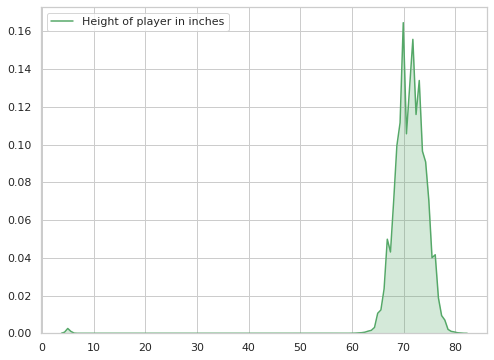

In [ ]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(8,6))
x = df.Height
x = pd.Series(x, name="Height of player in inches")
ax = sns.kdeplot(x, shade=True, color='g')
plt.show()

**Number of left or right foot players**

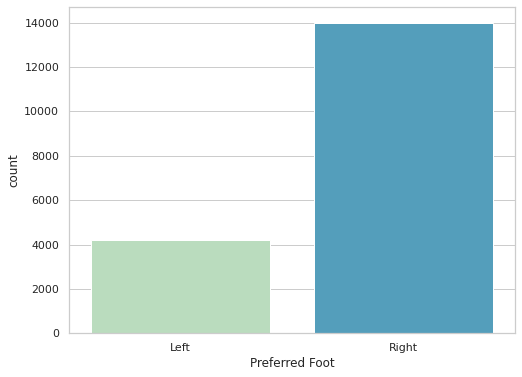

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x="Preferred Foot", data=df, palette = 'GnBu')
plt.show()

**Top ten countries in wages earned**

<Figure size 1440x864 with 0 Axes>

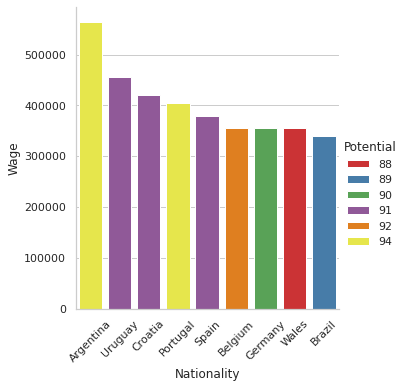

In [ ]:
df_countries=df.nlargest(10, 'Wage')
plt.figure(figsize=(20,12))
chart=sns.catplot(x='Nationality', y='Wage', hue="Potential", kind="bar", palette='Set1', dodge=False,data=df_countries)
chart.set_xticklabels(rotation=45)

**There are 164 countries from which we find FIFA players.The world map below illustrates the distribution of players per country.**




*   Europe has the highest number of players
*   Followed by South America
*   



In [ ]:
%%sh
pip install plotly==4.10.0

In [ ]:
df['Nationality'].head()

0    Argentina
1     Portugal
2       Brazil
3        Spain
4      Belgium
Name: Nationality, dtype: object

In [ ]:
df_nat=df.groupby(['Nationality']).size().reset_index(name='num_players')
df_nat.head()

,Nationality,num_players
0,Afghanistan,4
1,Albania,40
2,Algeria,60
3,Andorra,1
4,Angola,15


In [ ]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(df_nat,  # Input Pandas DataFrame
                    locations="Nationality",  # DataFrame column with locations
                    color="num_players",  # DataFrame column with color values
                    hover_name="Nationality", # DataFrame column hover info
                    color_continuous_scale=px.colors.diverging.RdYlGn[::-1],
                    locationmode = "country names") # Set to plot as US States
fig.update_layout(
    title_text = 'FIFA players world distribution', # Create a Title
    geo_scope='world',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

**Finding Youngest and oldest players**

In [ ]:
df_age=df.nlargest(10, 'Age')
df_age=df_age[['Name', 'Age', 'Nationality']]
df_age.style.background_gradient('inferno')

,Name,Age,Nationality
4741,O. Pérez,45,Mexico
17726,T. Warner,44,Trinidad & Tobago
18183,K. Pilkington,44,England
10545,S. Narazaki,42,Japan
1120,J. Villar,41,Paraguay
4228,B. Nivet,41,France
7225,C. Muñoz,41,Argentina
12192,H. Sulaimani,41,Saudi Arabia
15426,M. Tyler,41,England
41,G. Buffon,40,Italy


In [ ]:
df_age=df.nsmallest(10, 'Age')
df_age=df_age[['Name', 'Age', 'Nationality']]
df_age.style.background_gradient('inferno')

,Name,Age,Nationality
11457,W. Geubbels,16,France
11732,A. Taoui,16,France
12496,Pelayo Morilla,16,Spain
12828,Guerrero,16,Spain
13293,H. Massengo,16,France
13567,Y. Verschaeren,16,Belgium
15363,Y. Roemer,16,Netherlands
15746,Y. Begraoui,16,France
15793,J. Lahne,16,Sweden
16081,J. Italiano,16,Australia


Top ten players by their market value

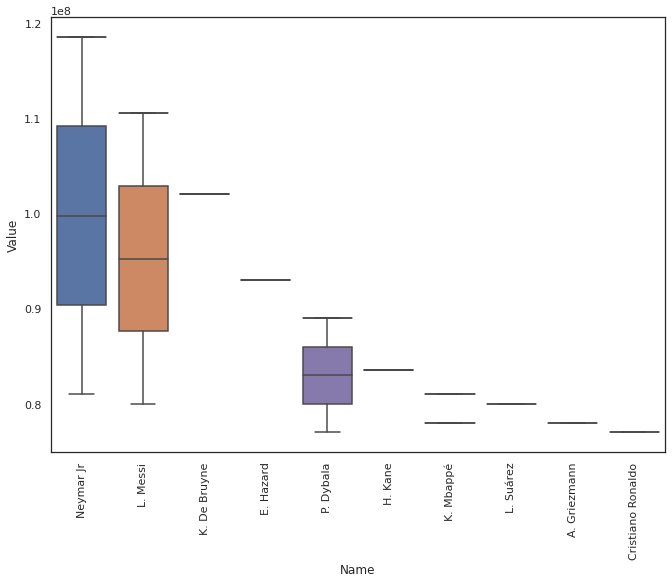

In [ ]:
sns.set(style="white")
plt.figure(figsize=(11,8))
df_value=df.nlargest(10, 'Value')
p = sns.boxplot(x = 'Club', y = 'Value', data = df_value)
p = sns.boxplot(x = 'Name', y = 'Value', data = df_value)
p = plt.xticks(rotation=90)

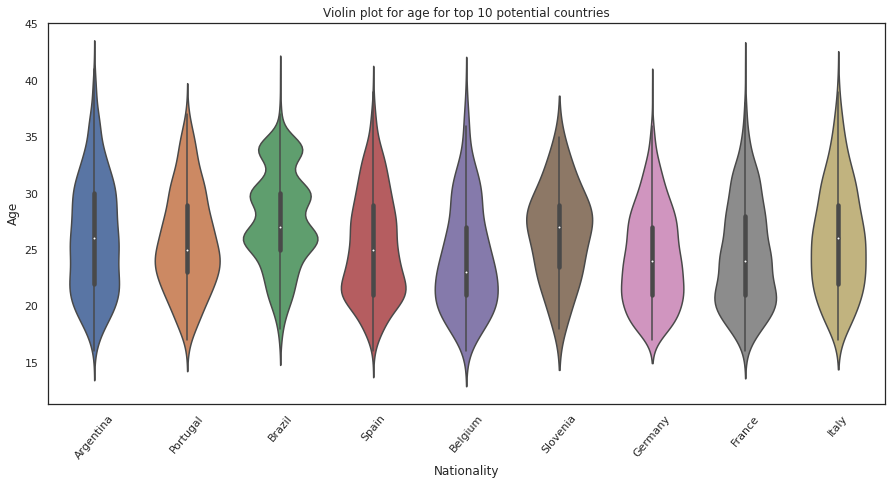

In [ ]:
top_potential_countries = list(df.nlargest(10, 'Potential').Nationality)
df_age = df.loc[df['Nationality'].isin(top_potential_countries) ]
plt.figure(1, figsize=(15, 7))
sns.violinplot(x = 'Nationality', y = 'Age', data = df_age)
plt.title('Violin plot for age for top 10 potential countries')
plt.xticks(rotation = 50)
plt.show()

Outlier detection using box plot

Observations outside the whiskers are outliers and are drawn as circles.

**England players with their market value based on their field position**

<Figure size 1440x864 with 0 Axes>

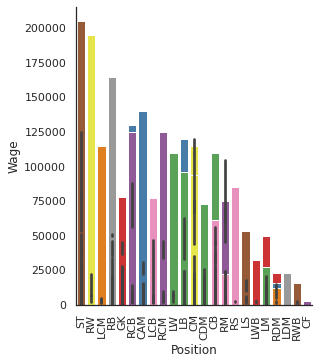

In [ ]:
sns.set(style="white")
plt.figure(figsize=(20,12))

df_england =df[df['Nationality']=='England']

chart=sns.catplot(x='Position', y='Wage', hue="Value", kind="bar", palette='Set1', dodge=False,data=df_england)
chart.set_xticklabels(rotation=90)
chart._legend.remove()

In [ ]:
df[['Nationality','Overall','Potential']].sort_values('Overall',ascending=False)['Nationality'].unique()[:10]

countries=list(df[['Nationality','Overall','Potential']].sort_values('Overall',ascending=False)['Nationality'].unique()[:10])
countries

['Argentina',
 'Portugal',
 'Brazil',
 'Spain',
 'Belgium',
 'Croatia',
 'Uruguay',
 'Slovenia',
 'Germany',
 'Poland']

In [ ]:
df_potential=df[['Nationality','Overall','Potential']]
df_potential.head()

,Nationality,Overall,Potential
0,Argentina,94,94
1,Portugal,94,94
2,Brazil,92,93
3,Spain,91,93
4,Belgium,91,92


In [ ]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

**Heatmap **

In [16]:
skill_columns=['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
from sklearn import preprocessing

df_skills=df[skill_columns]
df_skills.fillna(df.mean(),inplace=True)  
min_max_scaler = preprocessing.MinMaxScaler()
df_skills = min_max_scaler.fit_transform(df_skills)
df_skills = pd.DataFrame(df_skills)

In [17]:
corr = df_skills.corr()

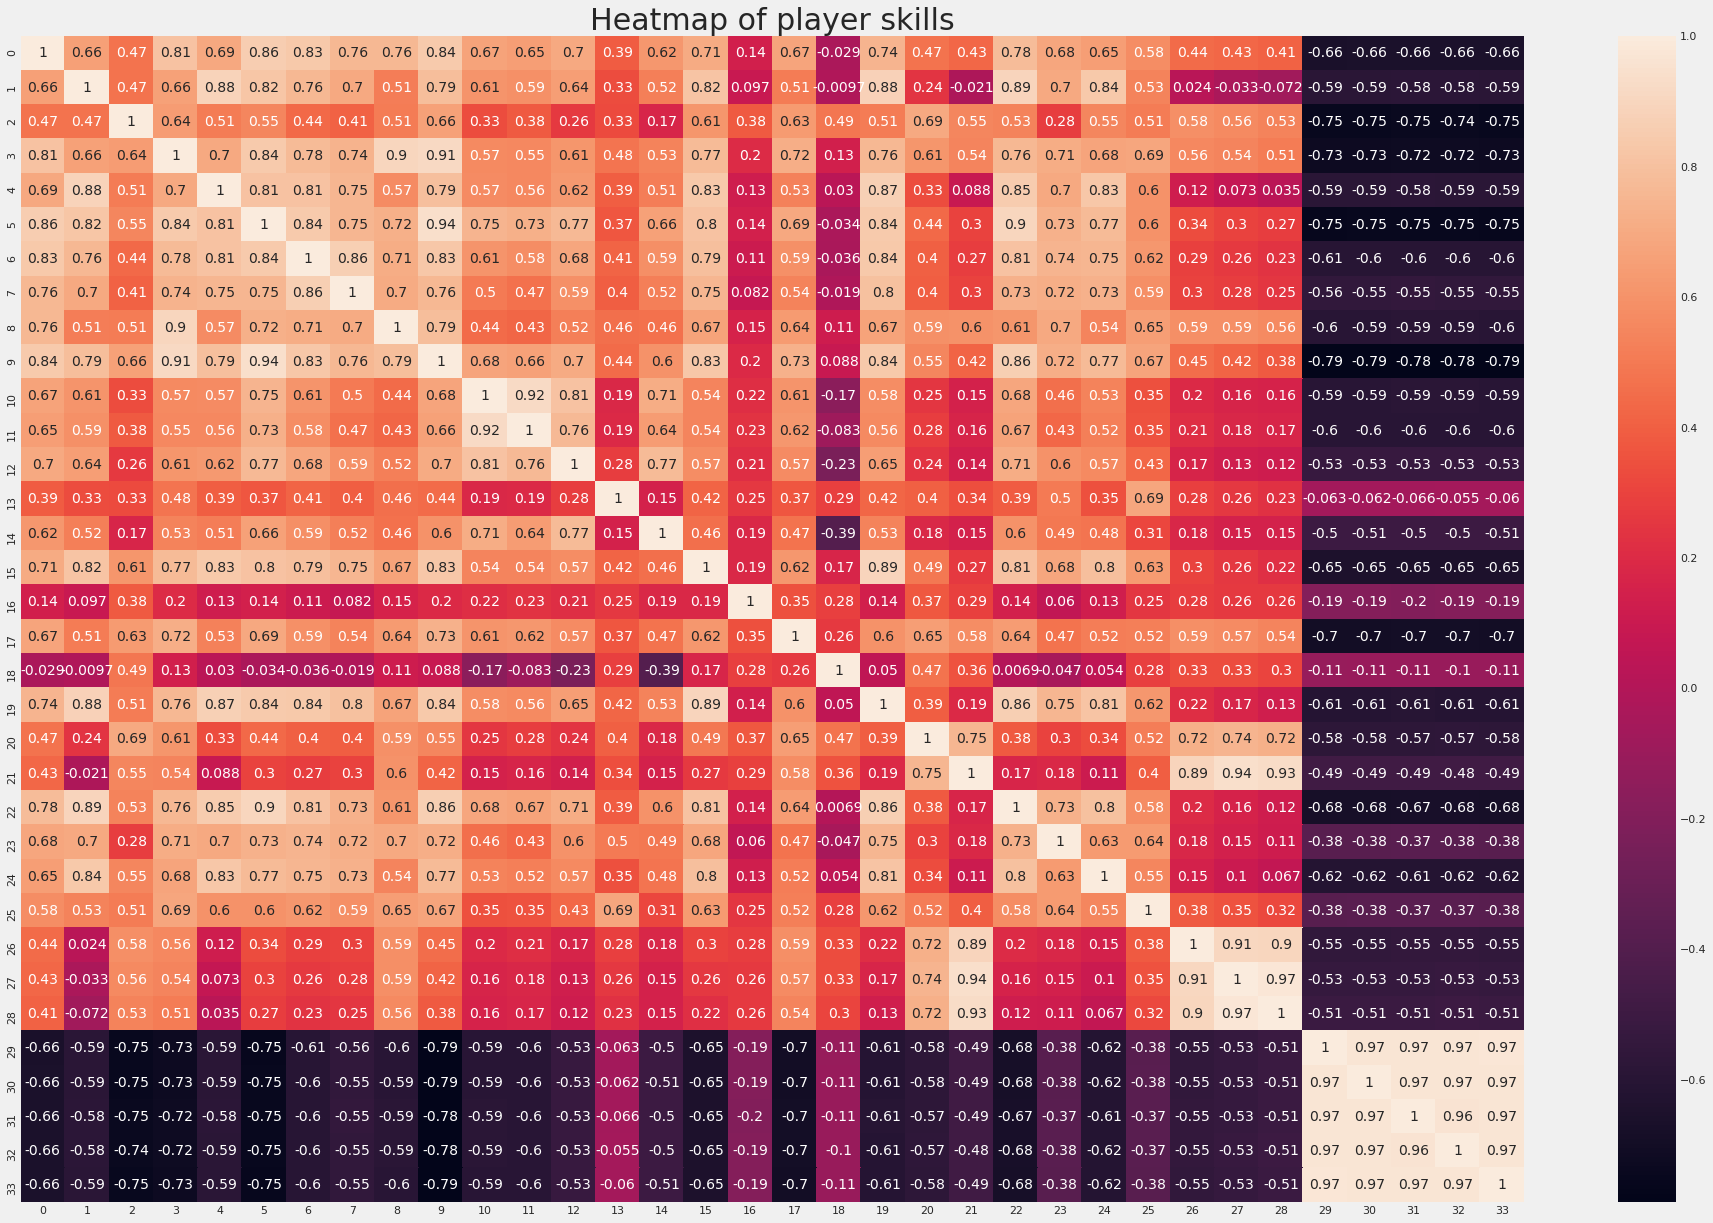

In [19]:

# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(corr, annot = True)

plt.title('Heatmap of player skills', fontsize = 30)
plt.show()

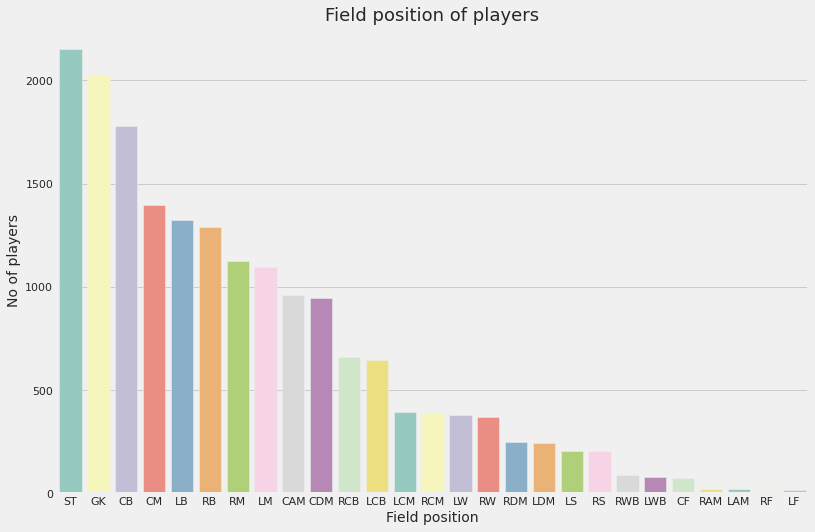

In [13]:
# different positions acquired by the players 

plt.figure(figsize = (12, 8))

ax = sns.countplot('Position', data = df, palette = 'Set3',order = df['Position'].value_counts().index)
ax.set_xlabel(xlabel = 'Field position', fontsize = 14)
ax.set_ylabel(ylabel = 'No of players', fontsize = 14)
ax.set_title(label = 'Field position of players', fontsize = 18)
plt.show()



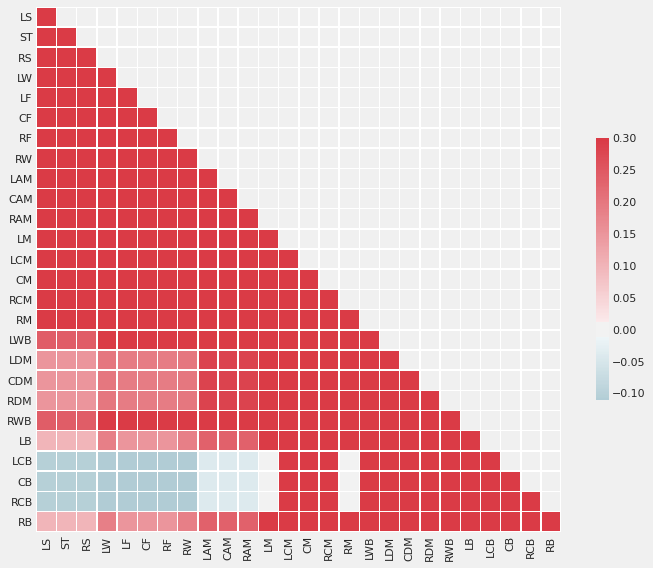

In [26]:
field_pos_columns=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

df_skills=df[field_pos_columns]
for i in field_pos_columns:
    df_skills[i] = df_skills[i].apply(lambda x: eval(x) if isinstance(x,str) else x)

df_skills.fillna(df_skills.mean(),inplace=True)  
min_max_scaler = preprocessing.MinMaxScaler()
df_skills = min_max_scaler.fit_transform(df_skills)
df_skills = pd.DataFrame(df_skills)

corr = df_skills.corr()

def get_lower_tri_heatmap(df_):
    mask = np.zeros_like(df_, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns_plot = sns.heatmap(df_, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},xticklabels=field_pos_columns, yticklabels=field_pos_columns)

get_lower_tri_heatmap(corr)


In [21]:
df_skills.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
df_skills.head()


In [ ]:
df.to_csv('football_data_clean1.csv')
!mv 'football_data_clean1.csv'  '/content/drive/My Drive/DataAnalytics/Clustering_Football/'

# **Additional Data Cleaning after Visualization**

In [ ]:
df['Work Rate'].head().unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High'],
      dtype=object)

**Drop non-numerical data as required per instruction**

In [ ]:
numerical_cols = [cname for cname in df.columns if  df[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
X_data = df[numerical_cols].copy()
X_data.shape

(18207, 45)

**Drop na values and check the samples**

In [ ]:
X_data.dropna(inplace=True)
X_data.shape
X_data.head()

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,10.0,67.0,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,7.0,74.0,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,10.0,69.0,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,1.0,76.0,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,7.0,71.0,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


**Verify is there are any missing vlues**

In [ ]:
 X_data.isnull().sum()

Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positionin